# Iniciando Projeto Análise de dados.

- O caso abaixo trata-se de um exercício de fixação de aprendizado onde tentarei montar um modelo que preveja a probabilidade de sobrevivência no  acidente do Titanic, baseado nas variáveis descritas nos anexos, citadas abaixo.

In [151]:
#importando bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#importando Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

#Importando o Scipy para analisar probabilidade.
from scipy.stats import norm

#Configurando Pandas e Numpy para exibir dados. obs.: threshold == retecências
np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)


### Nesta fase carregaremos a base de dados e faremos análises e tratamentos dos valores apresentados.

In [152]:
df = pd.read_csv('train.csv')

#Criando df1 para novas abordagens.
df1 = df.copy()

In [153]:
#Deleção de valores sem importancia para a amostra.
del df['PassengerId'], df['Ticket']

C:\Users\wesle\AppData\Local\Temp\ipykernel_2576\1692589650.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['pdf'] = pdf
C:\Users\wesle\AppData\Local\Temp\ipykernel_2576\1692589650.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm.sort_values(by='Age',inplace=True)


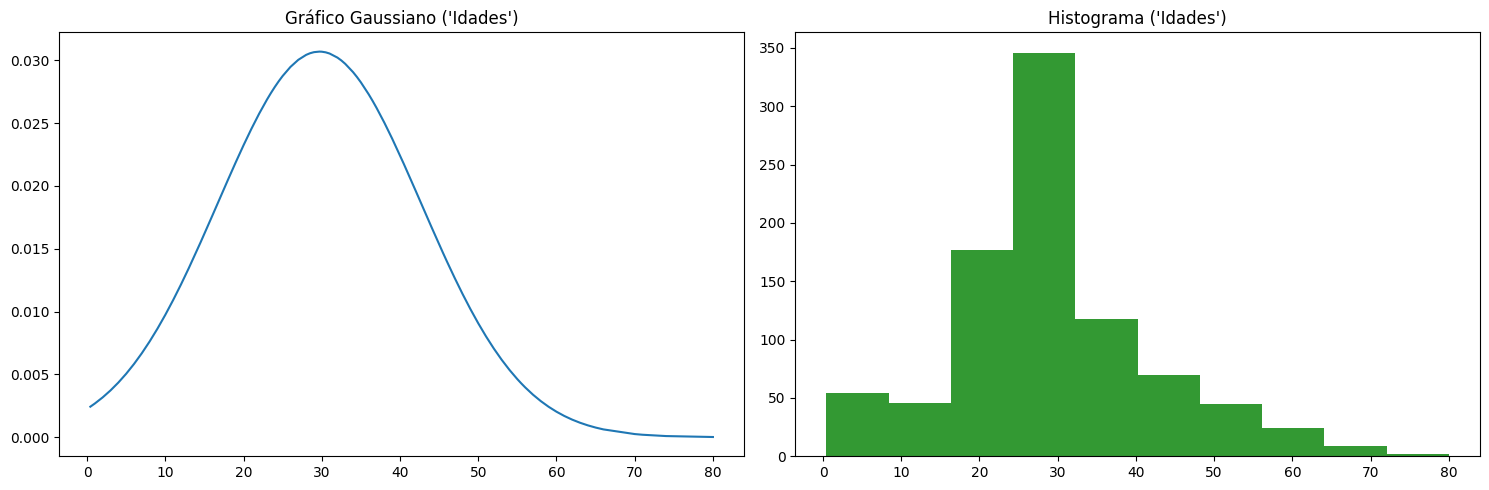

In [154]:
# Correção dos valores com Nan.

#Coluna Age, preenchendo valores faltantes com a média.
df['Age'].fillna(29.7, inplace=True)

#Coluna Embarked.
df['Embarked'].fillna('Not', inplace=True)

#Coluna Age. Decidi por não eliminar valores, visto std estar variando no valor da média.
df_norm = df[['Age']]
mean = df_norm.mean()
std = df_norm.std()
pdf = norm.pdf(df_norm,mean,std)
df_norm['pdf'] = pdf
df_norm.sort_values(by='Age',inplace=True)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(df_norm['Age'], df_norm['pdf'], label='Gráfico de Linha (\'Idades\')')
plt.title('Gráfico Gaussiano (\'Idades\')')
plt.subplot(1, 2, 2)
plt.hist(df['Age'], alpha=0.8, color='green', label='Histograma (\'Idades\')')
plt.title('Histograma (\'Idades\')')
plt.tight_layout()


In [155]:
#Alterando coluna Cabin. Onde N se tornou quem não possuia cabine.
string_cabin_df = df['Cabin'].astype(str)
string_cabin_df = df['Cabin'].str.upper()
new_cabin_df = pd.Categorical([string[0] if isinstance(string, str) else 'N' for string in string_cabin_df ])
df['Cabin'] = new_cabin_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     891 non-null    category
 9   Embarked  891 non-null    object  
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 64.0+ KB


In [156]:
#Setando a Coluna Sex para 0 e 1.
new_sex = pd.Categorical(df['Sex'])
new_sex = new_sex.rename_categories([0,1])
df['Sex'] = new_sex
df.head()

#Criando Coluna Family para melhor tratamento das colunas SibSp e Parch.
df['Family'] = df['SibSp'] + df['Parch']
del df['SibSp'], df['Parch']

### Iniciando o processo de analise preditiva com modelos Sklearn.

In [157]:
#Resetando index.
df.reset_index(drop=True,inplace=True)

#Usando OneHotEncoder para iniciarmos a aplicação dos dados em modelos de predição.
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[['Cabin', 'Embarked']]).toarray()
feature_label = ohe.categories_
feature_label = np.concatenate([feature_label[0],feature_label[1]])
df_ohe = pd.DataFrame(feature_array, columns=feature_label)
df = pd.concat([df,df_ohe],axis=1)
df.head()


,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family,A,B,C,D,E,F,G,N,T,C,Not,Q,S
0,0,3,"Braund, Mr. Owen Harris",1,22.00,7.25,N,S,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,71.28,C,C,1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,1,3,"Heikkinen, Miss. Laina",0,26.00,7.92,N,S,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,53.10,C,S,1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0,3,"Allen, Mr. William Henry",1,35.00,8.05,N,S,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [158]:
#deleção para evidar redundancias e excessos no modelo
del df['Cabin'], df['Embarked']

#Setando o Index do Dataframe df.
df.set_index('Name', inplace=True)


In [159]:
#Criando a base para treino e teste antes de fitar os modelos.
X, y = df.drop('Survived',axis=1),df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Criando Modelos

### Regressão Linear

In [160]:
lin_reg = LinearRegression()
modelo_lin = lin_reg.fit(X_train,y_train)

#Testando resultados.
alguns_dados = X_train.iloc[1:10]
labels = y_train.iloc[1:10]
predict = modelo_lin.predict(alguns_dados)
predict_arredondado = [round(valor,2) for valor in predict]
print(f'Predições: ', predict)
print(f'Sobreviventes: ', labels.values)

Predições:  [0.12 0.7  0.14 0.47 0.74 0.63 0.17 1.08 0.14]
Sobreviventes:  [0 1 0 1 1 1 0 1 0]


### Regressão Logística

In [161]:
from sklearn.linear_model import LogisticRegression

# Criando e treinando o modelo
log_reg = LogisticRegression()
modelo_log = log_reg.fit(X_train, y_train)

# Testando resultados no conjunto de treinamento
predict_train = modelo_log.predict(X_train.iloc[1:10])
predict_proba_train = modelo_log.predict_proba(X_train.iloc[1:10])[:, 1]  # Probabilidades para a classe positiva

# Exibindo resultados para o conjunto de treinamento
print(f'Predições no conjunto de treinamento:       ', predict_train)
print(f'Prob de Sobrevivência no conj de treinamento:', predict_proba_train)
print(f'Sobreviventes no conjunto de treinamento:   ', y_train.iloc[1:10].values)

# Usando modelo no conjunto de teste
predict_test = modelo_log.predict(X_test.iloc[1:10])
predict_proba_test = modelo_log.predict_proba(X_test.iloc[1:10])[:, 1]  # Probabilidades para a classe positiva

# Exibindo resultados para o conjunto de teste
print(f'Predições no conjunto de teste:             ', predict_test)
print(f'Prob de Sobrevivência no conj de teste:     ', predict_proba_test)
print(f'Sobreviventes no conjunto de teste:         ', y_test.iloc[1:10].values)

# Calculando e exibindo a acurácia no conjunto de teste
acuracia_teste = accuracy_score(predict_test, y_test.iloc[1:10].values)
print(f'Acurácia do modelo no conjunto de teste: {acuracia_teste:.2%}')

Predições no conjunto de treinamento:        [0 1 0 1 1 1 0 1 0]
Prob de Sobrevivência no conj de treinamento: [0.12 0.71 0.13 0.52 0.76 0.64 0.15 0.97 0.14]
Sobreviventes no conjunto de treinamento:    [0 1 0 1 1 1 0 1 0]
Predições no conjunto de teste:              [0 0 1 1 1 1 0 1 1]
Prob de Sobrevivência no conj de teste:      [0.18 0.14 0.85 0.78 0.9  0.68 0.11 0.76 0.94]
Sobreviventes no conjunto de teste:          [0 0 1 1 1 1 0 1 1]
Acurácia do modelo no conjunto de teste: 100.00%


c:\Users\wesle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Importando a Base teste não tratada pelo modelo.

- Definindo função para tratar a base de uma vez só.

In [162]:
def base_de_dados(name):
    caminho_arquivo = f'{name}.csv'
    nome = pd.read_csv(caminho_arquivo)
    del nome['PassengerId'], nome['Ticket']
    mean = nome['Fare'].mean()
    nome['Fare'].fillna(mean,inplace=True)
    nome['Age'].fillna(29.7, inplace=True)
    nome['Embarked'].fillna('N', inplace=True)
    string_cabin_nome = nome['Cabin'].astype(str)
    string_cabin_nome = nome['Cabin'].str.upper()
    new_cabin_nome = pd.Categorical([string[0] if isinstance(string, str) else 'N' for string in string_cabin_nome ])
    nome['Cabin'] = new_cabin_nome
    new_sexnome = pd.Categorical(nome['Sex'])
    new_sexnome = new_sexnome.rename_categories([0,1])
    nome['Sex'] = new_sexnome
    nome['Family'] = nome['SibSp'] + nome['Parch']
    del nome['SibSp'], nome['Parch']
    nome.reset_index(drop=True,inplace=True)

    return nome

df_test = base_de_dados('test')

#Ajustes na base de dados e tratamento de 4 dados faltantes.
ohedf_test = OneHotEncoder()
feature_arraydf_test = ohedf_test.fit_transform(df_test[['Cabin', 'Embarked']]).toarray()
feature_labeldf_test = ohedf_test.categories_
feature_labeldf_test= np.concatenate([feature_labeldf_test[0],feature_labeldf_test[1]])
df_test_ohe = pd.DataFrame(feature_arraydf_test, columns=feature_labeldf_test)
df_test = pd.concat([df_test,df_test_ohe],axis=1)
df_test.insert(16,'T',0)
df_test.insert(18,'Not',0)
del df_test['Cabin'], df_test['Embarked']
df_test.set_index('Name', inplace=True)

### Testando o modelo na base de teste.

In [163]:
#Usando a Regressão Logística já fitada.
predict_real = modelo_log.predict(df_test)
df_test['Prob_Survival'] = predict_real


In [164]:
tx_de_sobrevivencia = df_test['Prob_Survival'].sum() / df_test['Prob_Survival'].count() * 100

In [165]:
#Setando categoria de probabilidade de sobrevivencia.
survival = pd.Categorical(df_test['Prob_Survival'])
survival = survival.rename_categories(['Morreria', 'Não Morreria'])
df_test['Prob_Survival'] = survival

new_Pclass_test = pd.Categorical(df_test['Pclass'])
new_Pclass_test = new_Pclass_test.rename_categories(['1° Class', '2° Class', '3° Class'])
df_test['Pclass'] = new_Pclass_test

## Conclusão do primeiro modelo testado

In [166]:
print(f'A taxa de sobrevivência no acidente do Titanic foi de {tx_de_sobrevivencia:.2f}%\nAbaixo Segue a Lista de quem Sobreviveria:')

A taxa de sobrevivência no acidente do Titanic foi de 38.04%
Abaixo Segue a Lista de quem Sobreviveria:


In [167]:
df_result = df_test[['Pclass', 'Prob_Survival']]
df_result.sort_values(by='Pclass', inplace=True)
table_df = df_result.groupby('Pclass')['Prob_Survival'].value_counts().unstack()
prob = table_df['Não Morreria'] / (table_df['Morreria'] + table_df['Não Morreria']) * 100
table_df['Perc_Sobrev'] = prob
table_df

C:\Users\wesle\AppData\Local\Temp\ipykernel_2576\3939513872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result.sort_values(by='Pclass', inplace=True)


Prob_Survival,Morreria,Não Morreria,Perc_Sobrev
Pclass,,,
1° Class,41,66,61.68
2° Class,61,32,34.41
3° Class,157,61,27.98


In [ ]:
df_result

,Pclass,Prob_Survival
Name,,
"Rosenbaum, Miss. Edith Louise",1° Class,Não Morreria
"Greenfield, Mrs. Leo David (Blanche Strouse)",1° Class,Não Morreria
"Schabert, Mrs. Paul (Emma Mock)",1° Class,Não Morreria
"Cardeza, Mrs. James Warburton Martinez (Charlotte Wardle Drake)",1° Class,Não Morreria
"Gracie, Col. Archibald IV",1° Class,Morreria
"Maguire, Mr. John Edward",1° Class,Morreria
"Daniels, Miss. Sarah",1° Class,Não Morreria
"Beattie, Mr. Thomson",1° Class,Morreria
"Ryerson, Mr. Arthur Larned",1° Class,Morreria


### Aqui tento uma 2° abordagem usando categorias nominais.

In [ ]:
df1.head()
del df1['Ticket'], df1['PassengerId'],

In [ ]:
#Alteração da categoria Survived.
new_survived = pd.Categorical(df1['Survived'])
new_survived = new_survived.rename_categories(['Morreu','Sobreviveu'])
df1['new_survived'] = new_survived

#Alteração da categoria Pclass.
new_Pclass = pd.Categorical(df1['Pclass'])
new_Pclass = new_Pclass.rename_categories(['1° Class', '2° Class', '3° Class'])
df1['Pclass'] = new_Pclass

#Alteração da coluna Age.
mediana = np.median([el for el in df1['Age'] if (np.isnan(el) == False)])
new_age = np.where(df1['Age'].isnull(), mediana, df1['Age'])
df1['Age'] = new_age

In [ ]:
#Tratando a coluna Cabin. n passou a ser os que não possuem cabine.
char_cabin = df1['Cabin'].astype(str)
new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
df1['Cabin'] = new_cabin


In [ ]:
#Tratando as colunas SibSp e Parch.
df1['Family'] = df1['SibSp'] + df1['Parch']
most_family = np.where(df1['Family'] == max(df1['Family']))
set_most_family = df1.loc[most_family]
print(f'As maiores famílias a bordo:\n {set_most_family}')

As maiores famílias a bordo:
      Survived    Pclass                               Name     Sex   Age  \
159         0  3° Class         Sage, Master. Thomas Henry    male  28.0   
180         0  3° Class       Sage, Miss. Constance Gladys  female  28.0   
201         0  3° Class                Sage, Mr. Frederick    male  28.0   
324         0  3° Class           Sage, Mr. George John Jr    male  28.0   
792         0  3° Class            Sage, Miss. Stella Anna  female  28.0   
846         0  3° Class           Sage, Mr. Douglas Bullen    male  28.0   
863         0  3° Class  Sage, Miss. Dorothy Edith "Dolly"  female  28.0   

     SibSp  Parch   Fare Cabin Embarked new_survived  Family  
159      8      2  69.55     n        S       Morreu      10  
180      8      2  69.55     n        S       Morreu      10  
201      8      2  69.55     n        S       Morreu      10  
324      8      2  69.55     n        S       Morreu      10  
792      8      2  69.55     n        S       

In [ ]:
#Buscando correlação entre as colunas Survived, SibSp, Parch e Family.

#Definindo em int_fields apenas os dados de df1 que são do tipo 'int64'.
int_fields = df1.dtypes[df1.dtypes == 'int64'].index

#Definindo a correlação a partir de Int_fields.
corr = np.corrcoef(df1[int_fields].transpose()).round(2)
df1_corr = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
df1_corr

#Pela Correlação fica claro que as váriaveis SibSp e Parch possuem alta correlação, 
# valendo a pena a sua exclusão após a agregação para não gerar overfiting no modelo.

,Survived,SibSp,Parch,Family
Survived,1.00,-0.04,0.08,0.02
SibSp,-0.04,1.00,0.41,0.89
Parch,0.08,0.41,1.00,0.78
Family,0.02,0.89,0.78,1.00
